![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) after `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [1]:
getwd()
list.files()

[1] "/work/files/workspace"

[1] "men_results.csv"   "notebook.ipynb"    "soccer-pitch.jpg" 
[4] "women_results.csv"

In [2]:
#Install Packages (tidyverse)
install.packages("tidyverse")
install.packages("lubridate")

# Import necessary libraries
library(tidyverse)
library(lubridate)

The following package(s) will be installed:
- tidyverse [2.0.0]
These packages will be installed into "~/renv/library/R-4.2/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing tidyverse ...                      OK [linked from cache]
# Downloading packages -------------------------------------------------------
- Downloading lubridate from CRAN ...           OK [940.6 Kb in 0.12s]
Successfully downloaded 1 package in 0.33 seconds.

The following package(s) will be installed:
- lubridate [1.9.4]
These packages will be installed into "~/renv/library/R-4.2/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing lubridate ...                      OK [installed binary and cached in 0.77s]


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## I. Data Importation
Our two data men_results and women_results are beeing imported as men_results_df and women_results_df

In [3]:
men_results_df<-read_csv("men_results.csv", show_col_types = FALSE)
women_results_df<-read_csv("women_results.csv", show_col_types = FALSE)

New names:
• `` -> `...1`
New names:
• `` -> `...1`


In [4]:
head(men_results_df, 5)

...1 date       home_team away_team home_score away_score tournament
1 0    1872-11-30 Scotland  England   0          0          Friendly  
2 1    1873-03-08 England   Scotland  4          2          Friendly  
3 2    1874-03-07 Scotland  England   2          1          Friendly  
4 3    1875-03-06 England   Scotland  2          2          Friendly  
5 4    1876-03-04 Scotland  England   3          0          Friendly

In [5]:
head(women_results_df,5)

...1 date       home_team away_team home_score away_score tournament      
1 0    1969-11-01 Italy     France    1          0          Euro            
2 1    1969-11-01 Denmark   England   4          3          Euro            
3 2    1969-11-02 England   France    2          0          Euro            
4 3    1969-11-02 Italy     Denmark   3          1          Euro            
5 4    1975-08-25 Thailand  Australia 3          2          AFC Championship

## II. Descriptive Statistics: 
Summary of the statistic estimates of various variables in the data, including the **Median**, the **Mean**, the **Standard Deviation**, the **Maximum**, the **Minimum**, and the **Quartile**.
For our project purpose the focused variables will be: **home score** and **away score**.

## Men Data

In [6]:
summary(men_results_df)

      ...1            date             home_team          away_team        
 Min.   :    0   Min.   :1872-11-30   Length:44353       Length:44353      
 1st Qu.:11088   1st Qu.:1979-05-13   Class :character   Class :character  
 Median :22176   Median :1999-03-11   Mode  :character   Mode  :character  
 Mean   :22176   Mean   :1992-06-23                                        
 3rd Qu.:33264   3rd Qu.:2011-03-25                                        
 Max.   :44352   Max.   :2022-12-18                                        
   home_score       away_score      tournament       
 Min.   : 0.000   Min.   : 0.000   Length:44353      
 1st Qu.: 1.000   1st Qu.: 0.000   Class :character  
 Median : 1.000   Median : 1.000   Mode  :character  
 Mean   : 1.741   Mean   : 1.179                     
 3rd Qu.: 2.000   3rd Qu.: 2.000                     
 Max.   :31.000   Max.   :21.000                     

## Women Data

In [7]:
summary(women_results_df)

      ...1           date             home_team          away_team        
 Min.   :   0   Min.   :1969-11-01   Length:4884        Length:4884       
 1st Qu.:1221   1st Qu.:2000-06-23   Class :character   Class :character  
 Median :2442   Median :2009-07-13   Mode  :character   Mode  :character  
 Mean   :2442   Mean   :2007-08-17                                        
 3rd Qu.:3662   3rd Qu.:2016-04-12                                        
 Max.   :4883   Max.   :2022-07-31                                        
   home_score       away_score      tournament       
 Min.   : 0.000   Min.   : 0.000   Length:4884       
 1st Qu.: 0.000   1st Qu.: 0.000   Class :character  
 Median : 1.000   Median : 1.000   Mode  :character  
 Mean   : 2.273   Mean   : 1.431                     
 3rd Qu.: 3.000   3rd Qu.: 2.000                     
 Max.   :24.000   Max.   :24.000                     

## III.Data Preprocessing (Cleaning, Transformation, Wrangling, and Feature Engineering)
This Process centered on data preparation, assures data accuracy, consistency, appropriate formatting, and neccessary fields creation. 
It encompasses data cleaning, transformation, wrangling, and feature engineering tasks. 

In [8]:
data_preprocessing <- function(data) {
  
  ## Data Cleaning
  # Replace missing values in numeric columns with the mean or mode
  data <- data %>%
    mutate(across(where(is.numeric), ~ifelse(is.na(.), mean(., na.rm = TRUE), .)))  # Replace NA with mean for numeric columns
  
  # Replace missing values in character columns with the mode (most frequent value)
  data <- data %>%
    mutate(across(where(is.character), ~ifelse(is.na(.), names(sort(table(.), decreasing = TRUE))[1], .)))  # Replace NA with mode for character columns
  
  ## Data Transformation
  # Convert date column to Date format (assumes a column named "date" exists)
   if ("date" %in% colnames(data)) {
    data$date <- parse_date_time(data$date, orders = c("mdy", "dmy", "ymd"))  # Convert to Date type with multiple format options
  }
  
  ## Data Wrangling
  # Remove duplicate rows based on all columns
  data <- distinct(data) %>%
  # Filter data for FIFA World Cup
  filter(tournament == "FIFA World Cup" & date >= as.Date("2002-01-01"))
  
  ## Feature Engineering
  # Create new variable 'total_score' as sum of 'home_score' and 'away_score'
  if ("home_score" %in% colnames(data) & "away_score" %in% colnames(data)) {
    data <- data %>%
      mutate(Average_total_score = (home_score + away_score)/2)
  }
  
  return(data)
}

In [9]:
cleaned_men_results <- data_preprocessing(men_results_df)
head(cleaned_men_results, 5)

...1  date       home_team           away_team    home_score away_score
1 25164 2002-05-31 France              Senegal      0          1         
2 25165 2002-06-01 Germany             Saudi Arabia 8          0         
3 25166 2002-06-01 Republic of Ireland Cameroon     1          1         
4 25167 2002-06-01 Uruguay             Denmark      1          2         
5 25168 2002-06-02 Argentina           Nigeria      1          0         
  tournament     Average_total_score
1 FIFA World Cup 0.5                
2 FIFA World Cup 4.0                
3 FIFA World Cup 1.0                
4 FIFA World Cup 1.5                
5 FIFA World Cup 0.5

In [10]:
cleaned_women_results <- data_preprocessing(women_results_df)
head(cleaned_women_results, 5)

...1 date       home_team     away_team   home_score away_score
1 1600 2003-09-20 Nigeria       North Korea 0          3         
2 1601 2003-09-20 Norway        France      2          0         
3 1602 2003-09-20 Germany       Canada      4          1         
4 1603 2003-09-20 Japan         Argentina   6          0         
5 1604 2003-09-21 United States Sweden      3          1         
  tournament     Average_total_score
1 FIFA World Cup 1.5                
2 FIFA World Cup 1.0                
3 FIFA World Cup 2.5                
4 FIFA World Cup 3.0                
5 FIFA World Cup 2.0

In [11]:
dim(cleaned_women_results)

[1] 200   8

## IV.Data Visualization (Data Distribution)
The visualization stage enables an overview of women_results and men_results data shapes. The distribution of our data will be visually represented by Histograms to capture the **central tendencies**, the **skewness**, and **kurtosis** of our data

In [12]:
# Extract the year from the 'date' column and group by year
men_results_years <- cleaned_men_results %>%
  mutate(year = format(date, "%Y")) %>%
  group_by(year)
  #summarize(total_years_score = sum(total_score))  # Example summary operation

# View the result
men_results_years

New names:
• `` -> `...1`
• `...1` -> `...2`


...1  date       home_team           away_team           home_score
1   25164 2002-05-31 France              Senegal             0         
2   25165 2002-06-01 Germany             Saudi Arabia        8         
3   25166 2002-06-01 Republic of Ireland Cameroon            1         
4   25167 2002-06-01 Uruguay             Denmark             1         
5   25168 2002-06-02 Argentina           Nigeria             1         
6   25169 2002-06-02 England             Sweden              1         
7   25170 2002-06-02 Paraguay            South Africa        2         
8   25171 2002-06-02 Spain               Slovenia            3         
9   25172 2002-06-03 Brazil              Turkey              2         
10  25173 2002-06-03 Croatia             Mexico              0         
11  25174 2002-06-03 Italy               Ecuador             2         
12  25175 2002-06-04 China PR            Costa Rica          0         
13  25176 2002-06-04 Japan               Belgium             2         
14  25177 2002-06-04 South Korea         Poland              2         
15  25178 2002-06-05 Germany             Republic of Ireland 1         
16  25179 2002-06-05 Russia              Tunisia             2         
17  25180 2002-06-05 United States       Portugal            3         
18  25181 2002-06-06 Cameroon            Saudi Arabia        1         
19  25182 2002-06-06 Denmark             Senegal             1         
20  25183 2002-06-06 France              Uruguay             0         
21  25186 2002-06-07 Argentina           England             0         
22  25187 2002-06-07 Spain               Paraguay            3         
23  25188 2002-06-07 Sweden              Nigeria             2         
24  25189 2002-06-08 Brazil              China PR            4         
25  25190 2002-06-08 Italy               Croatia             1         
26  25192 2002-06-08 South Africa        Slovenia            1         
27  25193 2002-06-09 Costa Rica          Turkey              1         
28  25194 2002-06-09 Japan               Russia              1         
29  25196 2002-06-09 Mexico              Ecuador             2         
30  25197 2002-06-10 South Korea         United States       1         
⋮   ⋮     ⋮          ⋮                   ⋮                   ⋮         
355 44317 2022-11-29 Wales               England             0         
356 44318 2022-11-29 Iran                United States       0         
357 44319 2022-11-30 Poland              Argentina           0         
358 44320 2022-11-30 Saudi Arabia        Mexico              1         
359 44321 2022-11-30 Australia           Denmark             1         
360 44322 2022-11-30 Tunisia             France              1         
361 44323 2022-12-01 Japan               Spain               2         
362 44324 2022-12-01 Costa Rica          Germany             2         
363 44325 2022-12-01 Croatia             Belgium             0         
364 44326 2022-12-01 Canada              Morocco             1         
365 44327 2022-12-02 Serbia              Switzerland         2         
366 44328 2022-12-02 Cameroon            Brazil              1         
367 44329 2022-12-02 Ghana               Uruguay             0         
368 44330 2022-12-02 South Korea         Portugal            2         
369 44331 2022-12-03 Netherlands         United States       3         
370 44332 2022-12-03 Argentina           Australia           2         
371 44333 2022-12-04 France              Poland              3         
372 44334 2022-12-04 England             Senegal             3         
373 44335 2022-12-05 Japan               Croatia             1         
374 44336 2022-12-05 Brazil              South Korea         4         
375 44337 2022-12-06 Morocco             Spain               0         
376 44338 2022-12-06 Portugal            Switzerland         6         
377 44339 2022-12-09 Croatia             Brazil              1         
378 44340 2022-12-09 Netherlands         Arg

In [13]:
# Extract the year from the 'date' column and group by year
women_results_years <- cleaned_women_results %>%
  mutate(year = format(date, "%Y")) %>%
  group_by(year)
  #summarize(total_years_score = sum(total_score))  # Example summary operation

# View the result
women_results_years

New names:
• `` -> `...1`
• `...1` -> `...2`


...1 date       home_team     away_team     home_score away_score
1   1600 2003-09-20 Nigeria       North Korea   0          3         
2   1601 2003-09-20 Norway        France        2          0         
3   1602 2003-09-20 Germany       Canada        4          1         
4   1603 2003-09-20 Japan         Argentina     6          0         
5   1604 2003-09-21 United States Sweden        3          1         
6   1605 2003-09-21 Brazil        South Korea   3          0         
7   1606 2003-09-21 Australia     Russia        1          2         
8   1607 2003-09-21 China PR      Ghana         1          0         
9   1609 2003-09-24 Norway        Brazil        1          4         
10  1610 2003-09-24 France        South Korea   1          0         
11  1611 2003-09-24 Germany       Japan         3          0         
12  1612 2003-09-24 Canada        Argentina     3          0         
13  1613 2003-09-25 Sweden        North Korea   1          0         
14  1614 2003-09-25 United States Nigeria       5          0         
15  1615 2003-09-25 Ghana         Russia        0          3         
16  1616 2003-09-25 China PR      Australia     1          1         
17  1620 2003-09-27 South Korea   Norway        1          7         
18  1621 2003-09-27 France        Brazil        1          1         
19  1622 2003-09-27 Canada        Japan         3          1         
20  1623 2003-09-27 Argentina     Germany       1          6         
21  1625 2003-09-28 Sweden        Nigeria       3          0         
22  1626 2003-09-28 United States North Korea   3          0         
23  1627 2003-09-28 Ghana         Australia     2          1         
24  1628 2003-09-28 China PR      Russia        1          0         
25  1629 2003-10-01 Brazil        Sweden        1          2         
26  1630 2003-10-01 United States Norway        1          0         
27  1631 2003-10-02 Germany       Russia        7          1         
28  1632 2003-10-02 China PR      Canada        0          1         
29  1634 2003-10-05 United States Germany       0          3         
30  1635 2003-10-05 Sweden        Canada        2          1         
⋮   ⋮    ⋮          ⋮             ⋮             ⋮          ⋮         
171 4439 2019-06-16 Sweden        Thailand      5          1         
172 4440 2019-06-16 United States Chile         3          0         
173 4441 2019-06-17 France        Nigeria       1          0         
174 4442 2019-06-17 South Korea   Norway        1          2         
175 4443 2019-06-17 South Africa  Germany       0          4         
176 4444 2019-06-17 China PR      Spain         0          0         
177 4445 2019-06-18 Jamaica       Australia     1          4         
178 4446 2019-06-18 Italy         Brazil        0          1         
179 4447 2019-06-19 Japan         England       0          2         
180 4448 2019-06-19 Scotland      Argentina     3          3         
181 4449 2019-06-20 Netherlands   Canada        2          1         
182 4450 2019-06-20 Cameroon      New Zealand   2          1         
183 4451 2019-06-20 Sweden        United States 0          2         
184 4452 2019-06-20 Thailand      Chile         0          2         
185 4454 2019-06-22 Germany       Nigeria       3          0         
186 4455 2019-06-22 Norway        Australia     1          1         
187 4456 2019-06-23 England       Cameroon      3          0         
188 4457 2019-06-23 France        Brazil        2          1         
189 4458 2019-06-24 Spain         United States 1          2         
190 4459 2019-06-24 Sweden        Canada        1          0         
191 4460 2019-06-25 Italy         China PR      2          0         
192 4461 2019-06-25 Netherlands   Japan         2          1         
193 4462 2019-06-27 Norway        England       0          3         
194 4463 2019-06-28 France        United States 1          2         
195 4464 2019-06-29 Italy         Netherlands   0          2         
196 4465 2019-

## Compare the Men and Women Results

In [14]:
# Add Gender Column
gender_women_results <- mutate(women_results_years, gender = "Women")
gender_men_results <- mutate(men_results_years, gender = "Men")

# Stack the data frames using bind_rows()
stacked_men_women_results <- bind_rows(gender_men_results, gender_women_results) %>%
  #filter(year >= 1991 & year <= 2019) %>%
  arrange(year)
stacked_men_women_results

New names:
• `` -> `...1`
• `...1` -> `...2`


...1  date       home_team           away_team           home_score
1   25164 2002-05-31 France              Senegal             0         
2   25165 2002-06-01 Germany             Saudi Arabia        8         
3   25166 2002-06-01 Republic of Ireland Cameroon            1         
4   25167 2002-06-01 Uruguay             Denmark             1         
5   25168 2002-06-02 Argentina           Nigeria             1         
6   25169 2002-06-02 England             Sweden              1         
7   25170 2002-06-02 Paraguay            South Africa        2         
8   25171 2002-06-02 Spain               Slovenia            3         
9   25172 2002-06-03 Brazil              Turkey              2         
10  25173 2002-06-03 Croatia             Mexico              0         
11  25174 2002-06-03 Italy               Ecuador             2         
12  25175 2002-06-04 China PR            Costa Rica          0         
13  25176 2002-06-04 Japan               Belgium             2         
14  25177 2002-06-04 South Korea         Poland              2         
15  25178 2002-06-05 Germany             Republic of Ireland 1         
16  25179 2002-06-05 Russia              Tunisia             2         
17  25180 2002-06-05 United States       Portugal            3         
18  25181 2002-06-06 Cameroon            Saudi Arabia        1         
19  25182 2002-06-06 Denmark             Senegal             1         
20  25183 2002-06-06 France              Uruguay             0         
21  25186 2002-06-07 Argentina           England             0         
22  25187 2002-06-07 Spain               Paraguay            3         
23  25188 2002-06-07 Sweden              Nigeria             2         
24  25189 2002-06-08 Brazil              China PR            4         
25  25190 2002-06-08 Italy               Croatia             1         
26  25192 2002-06-08 South Africa        Slovenia            1         
27  25193 2002-06-09 Costa Rica          Turkey              1         
28  25194 2002-06-09 Japan               Russia              1         
29  25196 2002-06-09 Mexico              Ecuador             2         
30  25197 2002-06-10 South Korea         United States       1         
⋮   ⋮     ⋮          ⋮                   ⋮                   ⋮         
555 44317 2022-11-29 Wales               England             0         
556 44318 2022-11-29 Iran                United States       0         
557 44319 2022-11-30 Poland              Argentina           0         
558 44320 2022-11-30 Saudi Arabia        Mexico              1         
559 44321 2022-11-30 Australia           Denmark             1         
560 44322 2022-11-30 Tunisia             France              1         
561 44323 2022-12-01 Japan               Spain               2         
562 44324 2022-12-01 Costa Rica          Germany             2         
563 44325 2022-12-01 Croatia             Belgium             0         
564 44326 2022-12-01 Canada              Morocco             1         
565 44327 2022-12-02 Serbia              Switzerland         2         
566 44328 2022-12-02 Cameroon            Brazil              1         
567 44329 2022-12-02 Ghana               Uruguay             0         
568 44330 2022-12-02 South Korea         Portugal            2         
569 44331 2022-12-03 Netherlands         United States       3         
570 44332 2022-12-03 Argentina           Australia           2         
571 44333 2022-12-04 France              Poland              3         
572 44334 2022-12-04 England             Senegal             3         
573 44335 2022-12-05 Japan               Croatia             1         
574 44336 2022-12-05 Brazil              South Korea         4         
575 44337 2022-12-06 Morocco             Spain               0         
576 44338 2022-12-06 Portugal            Switzerland         6         
577 44339 2022-12-09 Croatia             Brazil              1         
578 44340 2022-12-09 Netherlands         Arg

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_bar()`).”


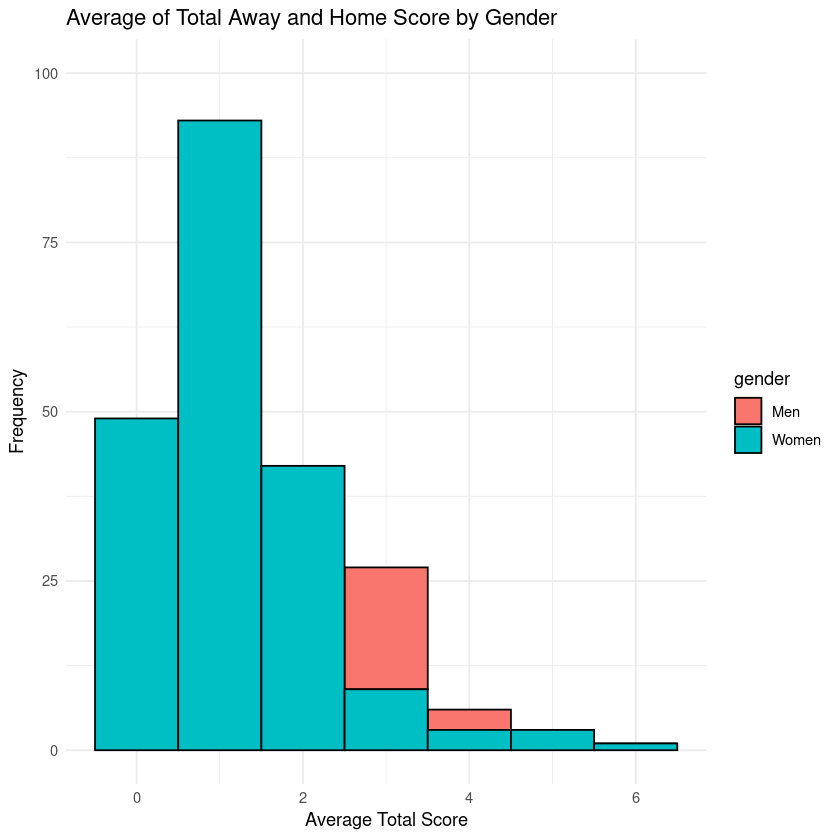

In [15]:
# Load ggplot2 package
library(ggplot2)

# Sample data structure for illustration
# data <- data.frame(total_score = c(...), group = c("men", "women", ...))

# Create the stacked histogram
ggplot(stacked_men_women_results, aes(x = Average_total_score, fill = gender)) +
  geom_histogram(binwidth = 1, position = "stack", color = "black") +
  labs(title = "Average of Total Away and Home Score by Gender", 
       x = "Average Total Score", 
       y = "Frequency") +
  ylim(0, 100) + # Adjust the maximum value as needed
  theme_minimal()


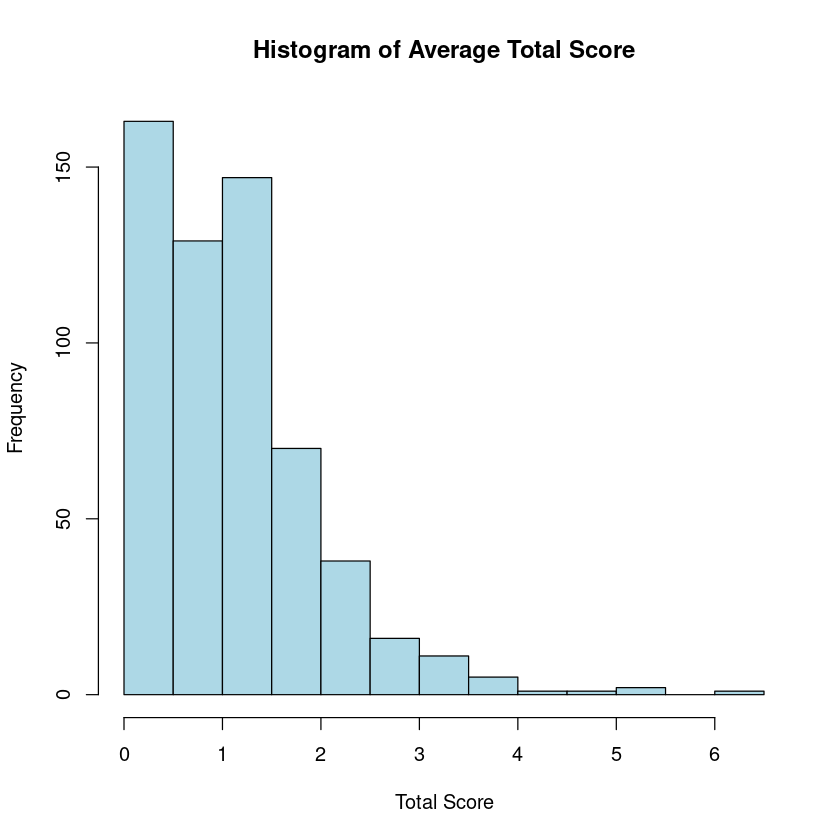

In [16]:
# Basic histogram with base R
hist(stacked_men_women_results$Average_total_score, 
     main = "Histogram of Average Total Score", 
     xlab = "Total Score", 
     ylab = "Frequency", 
     col = "lightblue", 
     border = "black")


## V.Hypothesis Testing
The Hypothesis test enables us to know whether the observed data is statistically significant, and whether results must be rejected or not. The data indicates that **Women total score is higher than men's**.
Our sample data to be used for our test is **stacked_men_women_results**, which includes the total scores of every year for each gender. The output will be interpreted and enables us to draw a conclusion. The **confidence level** selected for the test is **90%** 

Since the data is not normally distributed, the t-test can't be used. 
The Mann-Whitney U Test will be used as a direct alternative to the two-sample t-test.


In [17]:
# Perform the two-sample t-test
#test_result <- t.test(total_score ~ gender, data = stacked_men_women_results, alternative = #"less")
#Mann-Whitney U Test (also called the Wilcoxon Rank-Sum Test):
mw_test <- wilcox.test(Average_total_score ~ gender, data = stacked_men_women_results, alternative = "less")

# Extract p-value from the test result
p_val_mw <- mw_test$p.value

# Extract p-value from the test result
#p_val <- test_result$p.value

# Create the result string based on p-value and significance level (0.10)
alpha <- 0.10
result <- ifelse(p_val_mw < alpha, "reject", "fail to reject")

# Store the result in a data frame
result_df <- data.frame(p_val = p_val_mw, result = result)

# Print the result
print(result_df)

       p_val result
1 0.00510661 reject


## Test Result Interpretation and Conlusion
The results of the two-sample t-test indicate that there is significant difference between the mean total score for men and women.

**Interpretation:**
**p-value = 0.00510661:** The p-value is much less than the **significance level of 0.10**, which means **_we reject the null hypothesis_**.

**Alternative hypothesis:** The test was designed to check if the mean score for men is less than that for women, and the data supports this claim.

**Conclusion:**
Since the **p-value is low (0.00510661)**, there is sufficient evidence to conclude that the mean total score for men is less than that for women. Therefore, we reject the null hypothesis that there is no significant difference in the means between the two groups at 10% significance level.

## V.Hypothesis Test Recap:

**Null Hypothesis (H₀):** The mean total score for men (group1) is equal to the mean total score for women (group2).
𝐻0:𝜇men = 𝜇women

**Alternative Hypothesis (H₁)**: The mean total score for men (group1) is less than the mean total score for women (group2).
𝐻1:𝜇men < 𝜇women
 
**Significance Level (α):** 0.10 (10%)
**
Interpretation of p-value:**
**The p-value of 0.00510661** is less than the **significance level of 0.10**.

**Conclusion:**
Since the p-value (0.00510661) is less than 0.10, **we reject the null hypothesis (H₀)** and conclude that there is significant evidence to support the alternative hypothesis (H₁) that the mean total score for men is significantly less than the mean total score for women.

Thus, based on the statistical analysis, **the data suggests that women perform highly (i.e., have higher mean total scores) than men.**

**Final Interpretation:**
Rejecting H₀ means the mean of group1 (men) is statistically significantly less than the mean of group2 (women).
This result supports the idea that women (group2) have higher total scores than men (group1) in the context of this data.